## Linear Regression

### Step 1: data generation and scatter plot (red points)

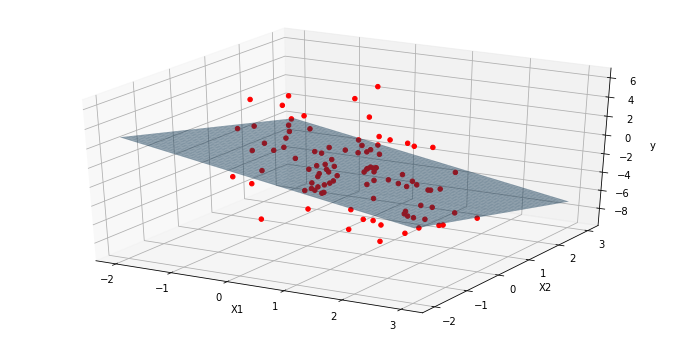

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n=100
X1=3*np.random.rand(n, 1)-1
X2=3*np.random.rand(n, 1)-1
X=np.concatenate((X1, X2), axis=1)
noiseLevel=3
noise=noiseLevel*np.random.randn(n, 1)
A=-1
B=-1
C=-1
D=-1
y=-(A*X1+B*X2+D)/C+noise

#adding generated data as red points to the graph
ax=plt.figure(figsize=(12,6)).gca(projection='3d')
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
ax.scatter(X1, X2, y, color='red', alpha=1)

#adding plane to the graph
m=50 #some value, i.e. between 10 and 100
xx, yy = np.meshgrid(np.linspace(-2, 3, m), np.linspace(-2, 3, m))
zz = -(A * xx + B * yy + D) * 1. / C 
ax.plot_surface(xx, yy, zz, alpha=0.5)

plt.show()

### Step 2: linear regression training and prediction using Normal Equation and scatter plot (green points)

X_b
[[ 1.         -0.99727805  0.08018004]
 [ 1.         -0.04646366 -0.38789378]
 [ 1.         -0.57777289 -0.63933115]
 [ 1.          1.14514096  0.05492863]
 [ 1.          0.61431186 -0.86441876]
 [ 1.          1.70924078  1.63007203]
 [ 1.          0.47269879  0.94897697]
 [ 1.          1.63900134  0.41029823]
 [ 1.          1.73045615  0.78646286]
 [ 1.          1.45849713  1.59350854]
 [ 1.         -0.63615149 -0.89511402]
 [ 1.          0.85738527  1.34256441]
 [ 1.         -0.18533334  1.09101272]
 [ 1.          0.87431652 -0.21927589]
 [ 1.          0.24177503  0.29674503]
 [ 1.         -0.7358398   1.59292812]
 [ 1.          1.73530561  1.08453975]
 [ 1.          0.50181381 -0.38380393]
 [ 1.         -0.26244985 -0.19885912]
 [ 1.          1.72468858  0.45481138]
 [ 1.         -0.95669388  1.74244293]
 [ 1.          1.35527032  1.17406776]
 [ 1.         -0.07339125  1.60960097]
 [ 1.          1.29334483  0.28784944]
 [ 1.          1.26472128 -0.14732968]
 [ 1.          0.5593

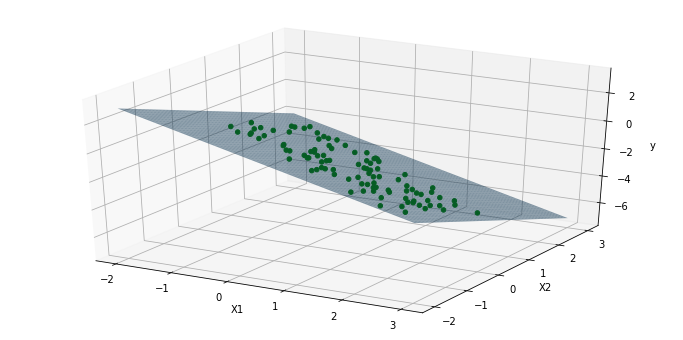

In [3]:
%matplotlib inline

"""
y^ = X.w
w = (X^T.X)^T.X^T.y
X = | 1 X1,1 X2,1 |
    | 1 X1,2 X2,2 |
    | ...         |
    | 1 X1,n X2,n |
"""

#adding x0 = 1 to each instance
X_b = np.c_[np.ones((n, 1)), X]     # => X
print("X_b")
print(X_b)
print()

#calculating w_estimate value to predict y values acording to X1 and X2
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)     # => w
print("w_estimate")
print(w_estimate)
print()

#For all X1 and X2 points, calculating the predicted values of y 
#For all X1 and X2 points, X_new = X
#For all X1 and X2 points, X_new_b = X_b
y_predict = X_b.dot(w_estimate)     # => y^ = X.w
print("y_predict")
print(y_predict)
print()

#adding preicted data as green points to the graph using Normal Equation
ax=plt.figure(figsize=(12,6)).gca(projection='3d')
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
ax.scatter(X1, X2, y_predict, color='green', alpha=1)

#adding plane to the graph
m=50 #some value, i.e. between 10 and 100
xx, yy = np.meshgrid(np.linspace(-2, 3, m), np.linspace(-2, 3, m))
zz = -(A * xx + B * yy + D) * 1. / C 
ax.plot_surface(xx, yy, zz, alpha=0.5)

plt.show()

### Step 3: linear regression training and prediction using Scikit-learn and scatter plot (green points)

lin_reg.intercept_, lin_reg.coef_
[-0.89082737] [[-1.59263896 -1.06799676]]

y_predict
[[ 0.61184448]
 [-0.40255823]
 [ 0.71215984]
 [-2.77328706]
 [-0.94600793]
 [-5.35394248]
 [-2.65717021]
 [-3.93936194]
 [-4.48675903]
 [-4.91554868]
 [ 1.07831114]
 [-3.690187  ]
 [-1.76085633]
 [-2.04911198]
 [-1.59281043]
 [-1.42014232]
 [-4.81282762]
 [-1.28013423]
 [-0.26045861]
 [-4.12337067]
 [-1.22808284]
 [-4.30318426]
 [-2.49299022]
 [-3.25808101]
 [-2.74772413]
 [-1.63588244]
 [ 1.2552382 ]
 [-4.69694737]
 [-2.43255954]
 [-3.5788475 ]
 [-2.93447283]
 [-1.42014033]
 [-4.28097083]
 [-2.6124536 ]
 [-2.23969305]
 [-0.63276115]
 [ 0.47072661]
 [-2.89790723]
 [-6.04738323]
 [-2.76682239]
 [-2.00672702]
 [-0.29682578]
 [-0.82468189]
 [-3.24075655]
 [-5.38797476]
 [-1.74041491]
 [-3.97379397]
 [-2.50282555]
 [-2.41630512]
 [-1.11126301]
 [-3.8469125 ]
 [-3.76961324]
 [ 0.55839969]
 [-2.74367015]
 [-3.2189173 ]
 [-0.94657706]
 [-4.46285969]
 [-3.91291972]
 [-4.78551252]
 [-1.70252827]
 [-1.20034069

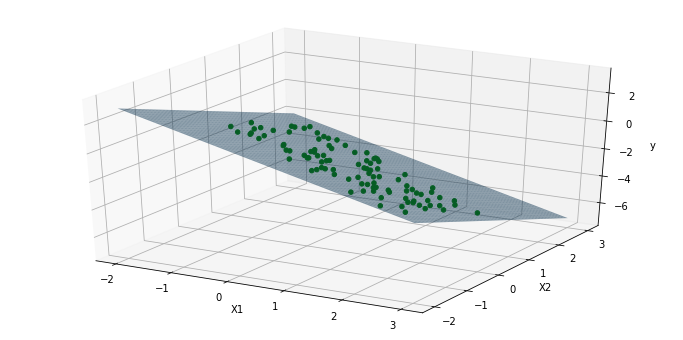

In [4]:
from sklearn.linear_model import LinearRegression
%matplotlib inline

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("lin_reg.intercept_, lin_reg.coef_")
print(lin_reg.intercept_, lin_reg.coef_)
print()

#For all X1 and X2 points, calculating the predicted values of y 
#For all X1 and X2 points, X_new = X
y_predict = lin_reg.predict(X)
print("y_predict")
print(y_predict)
print()

#adding preicted data as green points to the graph using Scikit-Learn
ax=plt.figure(figsize=(12,6)).gca(projection='3d')
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
ax.scatter(X1, X2, y_predict, color='green', alpha=1)

#adding plane to the graph
m=50 #some value, i.e. between 10 and 100
xx, yy = np.meshgrid(np.linspace(-2, 3, m), np.linspace(-2, 3, m))
zz = -(A * xx + B * yy + D) * 1. / C 
ax.plot_surface(xx, yy, zz, alpha=0.5)

plt.show()